# EDA

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as gx

from sklearn.preprocessing import StandardScaler, LabelEncoder

### Read data and show sample

In [37]:
df = pd.read_csv("../data/raw/Test_Pandas.csv")
df.head()

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_date
0,1925574,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355333 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,1/10/15 0:24
1,1925617,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355888 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,1/10/15 0:26
2,943600,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,25/8/15 21:02
3,1064405,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,30/8/15 20:16
4,20046620,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NEWERA BLACK: 35.0, NIKE SWOOSH DENIM: 35.0, ...",35.0,300,Women's Apparel,0,0,0,9/5/16 1:14


### What data features need to be cleaned?

In [38]:
print(f"Count of duplicated rows: {df.duplicated().sum()}")
print(f"Count of missing values per feature:\n{df.isna().sum()}")

Count of duplicated rows: 0
Count of missing values per feature:
itemid                   0
shopid                   0
item_name                3
item_description      1097
item_variation           0
price                    0
stock                    0
category                11
cb_option                0
is_preferred             0
sold_count               0
item_creation_date       0
dtype: int64


There's no duplicates in our data, but there's a missing values in some features (item_name, item_description, category).

### What cleaning methods you applied to get a clean data

In [39]:
print(df[df['item_name'].isna()])

         itemid  shopid item_name  item_description item_variation  price  \
280609  1628947  794603       NaN   quartz necklace             {}    7.0   
280610  1628992  794603       NaN  quartz necklaces             {}    7.0   
280611  1629038  794603       NaN    dome bracelets             {}    3.0   

        stock                 category  cb_option  is_preferred  sold_count  \
280609      1  Jewellery & Accessories          0             0           0   
280610      1  Jewellery & Accessories          0             0           0   
280611      1  Jewellery & Accessories          0             0           0   

       item_creation_date  
280609      20/9/15 12:40  
280610      20/9/15 12:42  
280611      20/9/15 12:44  


After close up inspection of this features we can see that:
- item_name: we can take information from item_description and put it inside item_name
- item_description: we can fill the values with empty string
- category: this is our target feature and the only thing we can do is delete these rows

In [40]:
df.loc[df['item_name'].isna(), 'item_name'] = df.loc[df['item_name'].isna(), 'item_description']
df.loc[df['item_description'].isna(), 'item_description'] = ""
df.dropna(inplace=True, subset=['category'])

df.isna().sum()

itemid                0
shopid                0
item_name             0
item_description      0
item_variation        0
price                 0
stock                 0
category              0
cb_option             0
is_preferred          0
sold_count            0
item_creation_date    0
dtype: int64

### The description of the data

1. itemid - unique item identifier. It appears to be actually unique;
2. shopid - shop identifier. In total we have information from 7856 shops;
3. item_name - name of the product that is used during its sale. We found 118346
unique item names but chances are that some of them are just different names
for the same item;
4. item_description - textual description of item provided by a seller;
5. item_variation - array of possible item variations - different colors, package sizes,
shoe size and so on;
6. price - price of the item in USD;
7. stock - how much items are still available;
8. category - to which of 21 unique categories the item belongs;
9. cb_option - binary feature indicating whether the item can be sold cross-border.
Only 11% of items can not be sold to other countries;
10. is_preferred - binary feature indicating whether the item is sold by a shop fo-
cusing on this category and having an appropriate license or working with a
manufacturer directly. Only 4% of the items are sold by preferred shops;
11. sold_count - how many items the shop has sold so far;
12. item_creation_date - the date when the seller has created this item card. It
ranges from Jan 1, 2016 to Sept 9, 2017.

### The quantity of the data

In [41]:
print(f"Size of the dataset: {len(df)}")

Size of the dataset: 464422


### The data types of the features

In [42]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

itemid: int64
shopid: int64
item_name: object
item_description: object
item_variation: object
price: float64
stock: int64
category: object
cb_option: int64
is_preferred: int64
sold_count: int64
item_creation_date: object


### How many unique values per feature

In [43]:
df.nunique()

itemid                464422
shopid                  7856
item_name             118345
item_description      178747
item_variation        167195
price                   9034
stock                   5338
category                  20
cb_option                  2
is_preferred               2
sold_count               221
item_creation_date    112061
dtype: int64

### Categories of feature types

- item_id: discrete integer positive
- shop_id: discrete integer positive
- item_name: text
- item_description: text
- item_variation: text
- price: continious positive
- stock: discrete integer
- category: categorical
- cb_option: categorical (boolean)
- is_preffered: categorical (boolean)
- sold_count: discrete integer positive
- item_creation_date: date

### The distribution of each data feature and the target

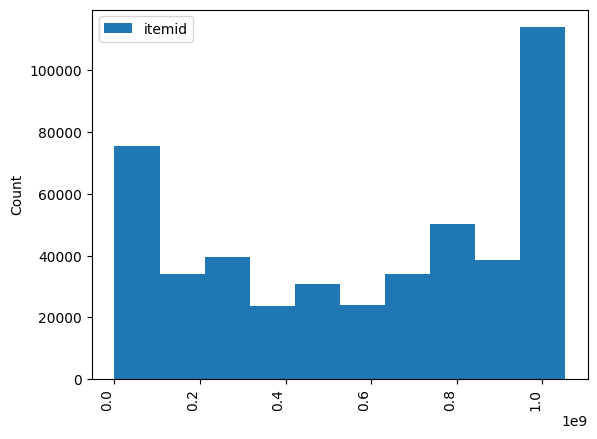

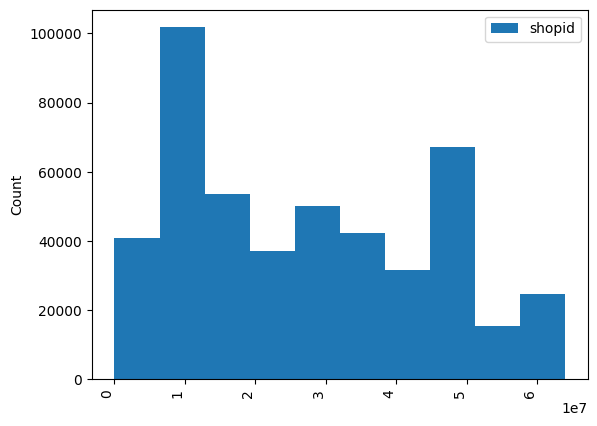

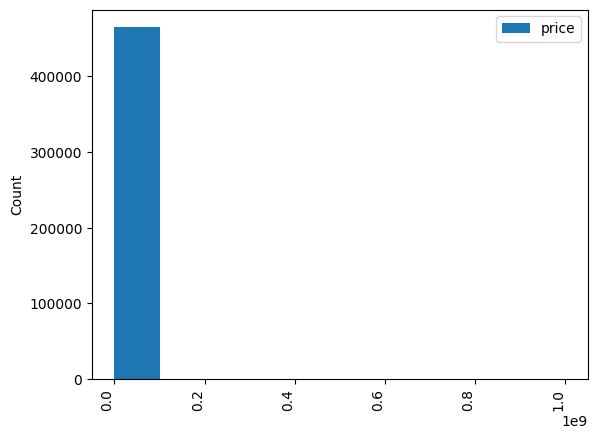

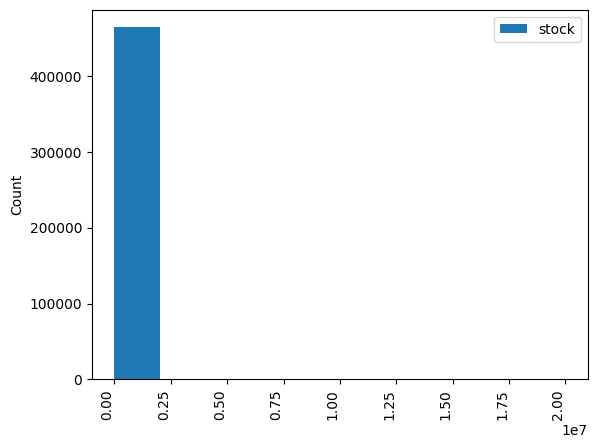

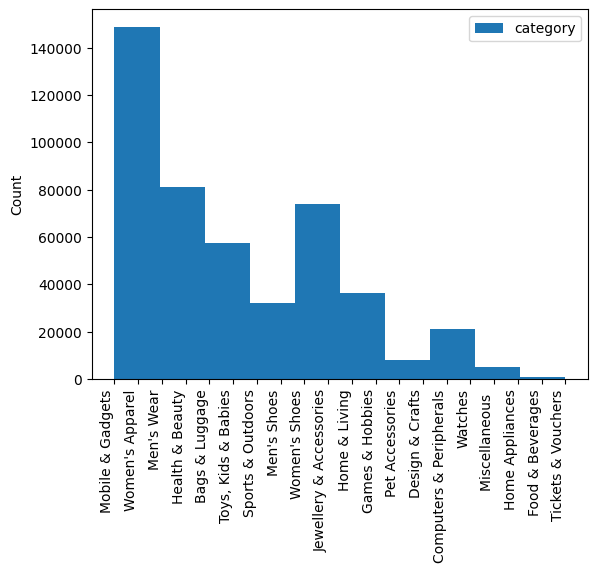

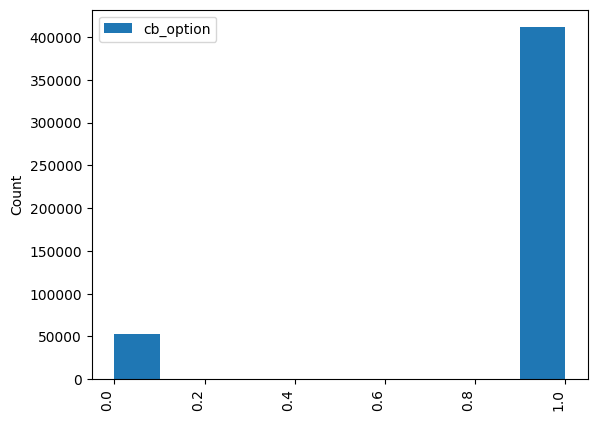

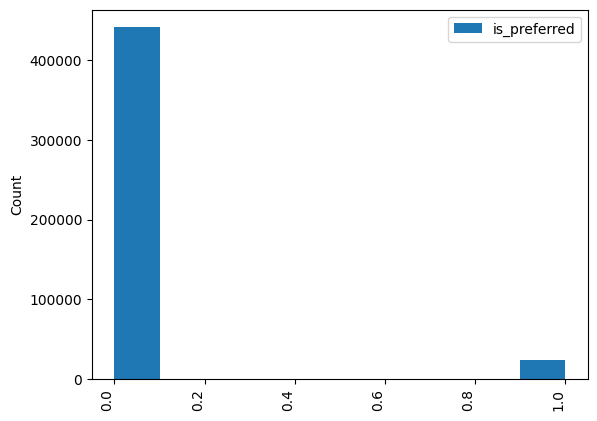

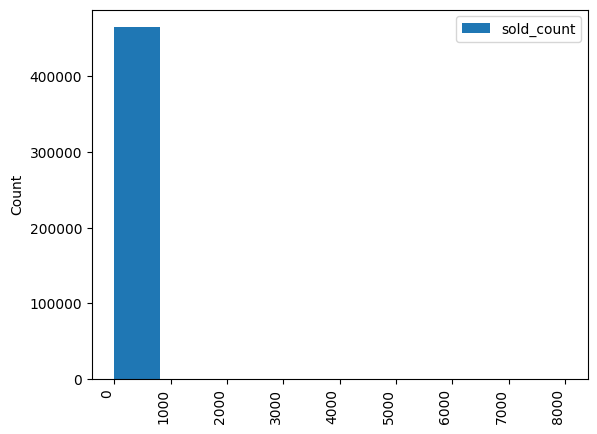

In [44]:
for column in df.columns:
    if df[column].dtype == object and column != 'category':
        continue
    else:
        plt.hist(df[column], label=column)
        plt.xticks(rotation=90, ha='right')
        plt.legend()
        plt.ylabel('Count')
        plt.show()

<b>Conclusion</b>

In features stock and price we can see, that most of the values sit in the start of the histogram. And maximum values in this is in 1e7 and 1e9 respectively. That means there is definitely outliers in this features. Because such high prices and stock shouldn't exist on the online store

Based on distribution of features there's no clear correlation between features. Most of the useful information for this task stored in the text features.

First of all we should transform text features into vectors and after that we probably can use one of decision tree methods for our classification or even neural networks.

### Data transformation methods for ML-ready datasets

- For continuos data we should and scale them.
- For text features we should embed them (but for preliminary data transformation I just drop this features).
- For data feature we should extract year, month, day.
- Encode target

In [45]:
scaler = StandardScaler()
scaler.fit(df[['price', 'stock']].to_numpy())
df[['price', 'stock']] = scaler.transform(df[['price', 'stock']].to_numpy())

In [47]:
df['item_creation_date'] = pd.to_datetime(df['item_creation_date'])
df['year'] = df['item_creation_date'].dt.year
df['month'] = df['item_creation_date'].dt.month
df['day'] = df['item_creation_date'].dt.day
df.drop(columns=['item_creation_date', 'item_description', 'item_name', 'item_variation'], inplace=True)

In [50]:
encoder = LabelEncoder()
encoder.fit(df['category'].to_numpy())
df['category'] = encoder.transform(df['category'].to_numpy())

How dataset looks after preliminary transformations

In [51]:
df.head()

,itemid,shopid,price,stock,category,cb_option,is_preferred,sold_count,year,month,day
0,1925574,210000,-0.004575,-0.046923,12,0,0,0,2015,1,10
1,1925617,210000,-0.004575,-0.046923,12,0,0,0,2015,1,10
2,943600,210000,-0.004660,-0.046923,12,0,0,0,2015,8,25
3,1064405,210000,-0.004660,-0.046923,12,0,0,0,2015,8,30
4,20046620,760000,-0.004654,-0.043226,18,0,0,0,2016,9,5


### Correlations

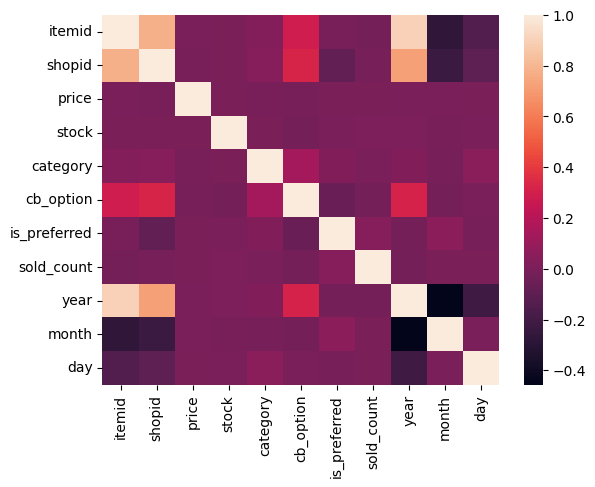

In [54]:
sns.heatmap(df.corr())
plt.show()

We've used Pearson correlation method because after preliminary data transformation all features represented in numbers. And it convenient for us use Pearson correlation
- itemid and shopid have correlation with cb_option, year and month
- cb_option have correlation with cb_option
- Target feature have correlation with cb_option

## Great Expectations

In [68]:
context = gx.get_context(context_root_dir="../services/gx")
ds = context.sources.add_or_update_pandas(name="Test_Pandas")
da = ds.add_csv_asset(
    name="asset01",
    filepath_or_buffer="../data/raw/Test_Pandas.csv"
)
br = da.build_batch_request()